# FastAI Computer Vision Tutorial #
https://docs.fast.ai/tutorial.vision.html

All docs

https://docs.fast.ai/

In [1]:
# installing/upgrading fastai2 
!pip install --upgrade fastai

from fastai.vision.all import *


In [2]:
%matplotlib inline

path = untar_data(URLs.PETS)


In [3]:
??path

Type:        PosixPath
String form: /root/.fastai/data/oxford-iiit-pet
File:        /opt/conda/lib/python3.10/pathlib.py
Source:     
class PosixPath(Path, PurePosixPath):
    """Path subclass for non-Windows systems.

    On a POSIX system, instantiating a Path should return this object.
    """
    __slots__ = ()

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
files = get_image_files(path/"images")
len(files)

7390

In [9]:
files[1],files[5]

(Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_18.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_79.jpg'))

In [7]:
def label_func(f): return f[0].isupper()

In [10]:
def label_func(f): return f[0].isupper()

In [11]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

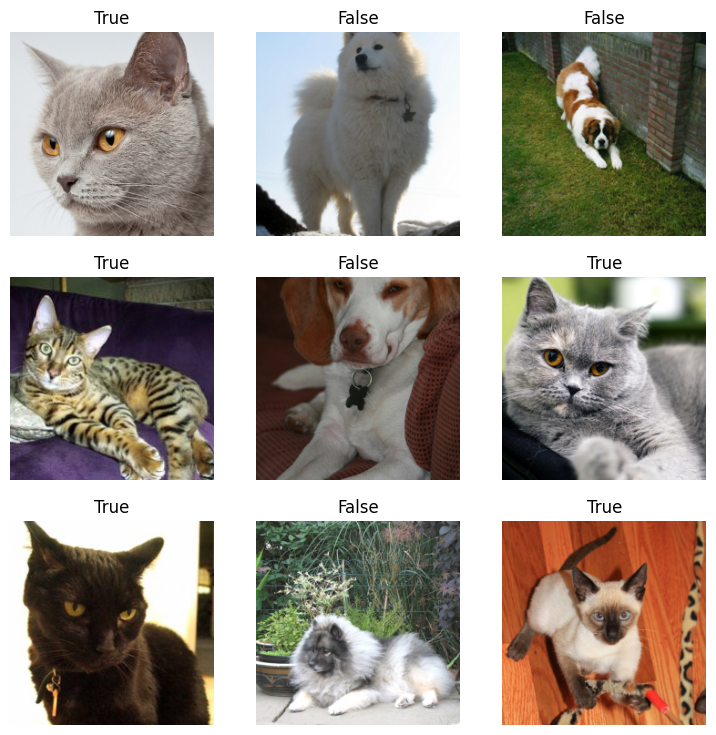

In [13]:
dls.show_batch()

# Jupyter Notebook Help
https://www.audiolabs-erlangen.de/resources/MIR/FMP/B/B_Jupyter.html#:~:text=There%20is%20an%20easy%20way,entire%20documentation%20string%20is%20opened.

In [17]:
??show_batch

Call signature: show_batch(*args, **kwargs)
Type:           TypeDispatch
String form:   
(Tabular,object) -> show_batch
(TensorImage,TensorImage) -> show_batch
(TensorImage,object) -> show_batch
(object,object) -> show_batch
File:           /opt/conda/lib/python3.10/site-packages/fastcore/dispatch.py
Source:        
class TypeDispatch:
    "Dictionary-like object; `__getitem__` matches keys of types using `issubclass`"
    def __init__(self, funcs=(), bases=()):
        self.funcs,self.bases = _TypeDict(),L(bases).filter(is_not(None))
        for o in L(funcs): self.add(o)
        self.inst = None
        self.owner = None

    def add(self, f):
        "Add type `t` and function `f`"
        if isinstance(f, staticmethod): a0,a1 = _p2_anno(f.__func__)
        else: a0,a1 = _p2_anno(f)
        t = self.funcs.d.get(a0)
        if t is None:
            t = _TypeDict()
            self.funcs.add(a0, t)
        t.add(a1, f)

    def first(self):
        "Get first function in ordered dict

In [18]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 138MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.143468,0.028850,0.007442,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.065248,0.023396,0.010149,00:32


In [19]:
learn.predict(files[0])

('False', tensor(0), tensor([9.9962e-01, 3.8301e-04]))

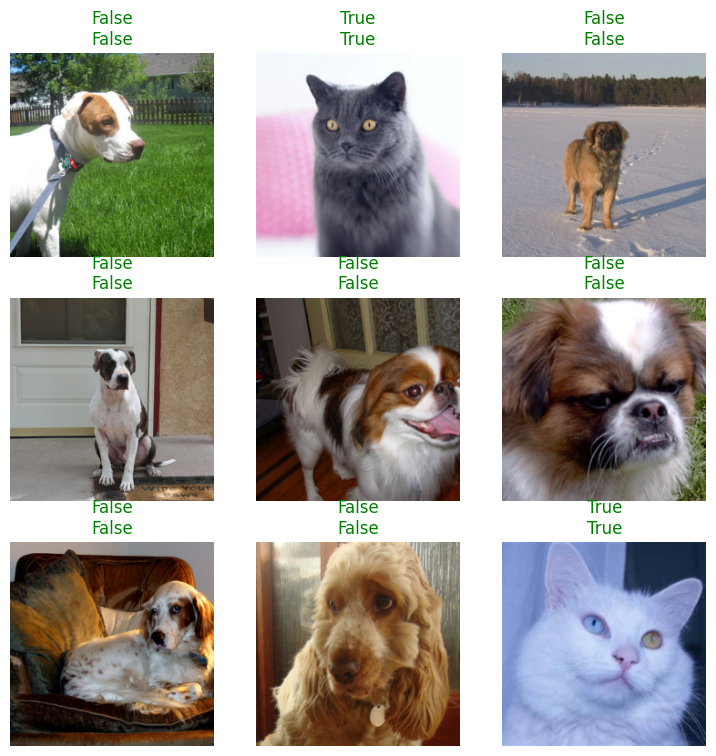

In [20]:
learn.show_results()

In [21]:
files[0].name

'beagle_115.jpg'

## Help on a particular function ##

In [22]:
help(learn)

Help on Learner in module fastai.learner object:

class Learner(fastcore.basics.GetAttr)
 |  Learner(dls: 'DataLoaders', model: 'callable', loss_func: 'callable | None' = None, opt_func: 'Optimizer | OptimWrapper' = <function Adam at 0x7a76754cce50>, lr: 'float | slice' = 0.001, splitter: 'callable' = <function trainable_params at 0x7a768dbe8a60>, cbs: 'Callback | MutableSequence | None' = None, metrics: 'callable | MutableSequence | None' = None, path: 'str | Path | None' = None, model_dir: 'str | Path' = 'models', wd: 'float | int | None' = None, wd_bn_bias: 'bool' = False, train_bn: 'bool' = True, moms: 'tuple' = (0.95, 0.85, 0.95), default_cbs: 'bool' = True)
 |  
 |  Group together a `model`, some `dls` and a `loss_func` to handle training
 |  
 |  Method resolution order:
 |      Learner
 |      fastcore.basics.GetAttr
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, event_name)
 |      Call `event_name` for all `Callback`s in `self.cbs`
 |  
 |  __e